# Used Car Price Prediction And Car Classification With Machine Learning

### Import All Needed Python libraries for regression and classification. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
from sklearn.linear_model import LinearRegression
import seaborn as sb

### Call the csv document containing the dataset.

In [3]:
folder_path = 'D:\\MachineLearningDatasets\\autos.csv'

df = pd.read_csv(folder_path)

### This is a description of the columns and their significance to the dataset.

In [4]:
#COLUMN NAME            COLUMN DEFINITION

# dateCrawled:          Date the car was crawled. (Date)
# name:                 Name of the car. (String)
# seller:               Type of seller (private or dealer). (String)
# offerType:            Type of offer (e.g. sale, repair, etc.). (String)
# price:                Price of the car. (Integer)
# abtest:               Test type (A or B). (String)
# vehicleType:          Type of vehicle (e.g. SUV, sedan, etc.). (String)
# yearOfRegistration:   Year the car was registered. (Integer)
# gearbox:              Type of gearbox (manual or automatic). (String)
# powerPS:              Power of the car in PS. (Integer)
# model:                Model of the car. (String)
# kilometer:            Kilometers the car has been driven. (Integer)
# monthOfRegistration:  Month the car was registered. (Integer)
# fuelType:             Type of fuel (e.g. diesel, petrol, etc.). (String)
# brand:                Brand of the car. (String)
# notRepairedDamage:    Whether or not the car has any damage that has not been repaired. (String)
# dateCreated:          Date the car was created. (Date)
# nrOfPictures:         Number of pictures of the car. (Integer)
# postalCode:           Postal code of the car. (Integer)
# lastSeen:             Date the car was last seen. (Date)

In [5]:
df.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [6]:
#The column names of the dataset.

df.columns

Index(['index', 'dateCrawled', 'name', 'seller', 'offerType', 'price',
       'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS',
       'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [7]:
#The length of the dataset.

df.size

7802088

## Data Preprocessing

### This section deals with cleaning the data to make it more understandable. The dataset contains German words, so they are being translated to English.

In [8]:
#Preprocess and clean data. 
#Convert German words to English.

#Seller Column
df['seller'].replace('privat','Private', inplace=True)
df['seller'].replace('gewerblich','Commercial', inplace=True)


#Offer Type Column
df['offerType'].replace('Angebot','Offer', inplace=True)
df['offerType'].replace('Gesuch','Wanted', inplace=True)

#Gearbox Column
df['gearbox'].replace('manuell','Manual', inplace=True)
df['gearbox'].replace('automatik','Automatic', inplace=True)


#Fuel Type
df['fuelType'].replace('benzin','Petrol', inplace=True)
df['fuelType'].replace('diesel','Diesel', inplace=True)
df['fuelType'].replace('andere','Other', inplace=True)
df['fuelType'].replace('elektro','Electric', inplace=True)
df['fuelType'].replace('lpg','LPG', inplace=True)
df['fuelType'].replace('hybrid','Hybrid', inplace=True)
df['fuelType'].replace('cng','CNG', inplace=True)

#Not Repaired Damage
df['notRepairedDamage'].replace('ja','Yes', inplace=True)
df['notRepairedDamage'].replace('nein','No', inplace=True)

#Vehicle Type
df['vehicleType'].replace('andere','Other', inplace=True)
df['vehicleType'].replace('kleinwagen','Small', inplace=True)
df['vehicleType'].replace('cabrio','Convertible', inplace=True)
df['vehicleType'].replace('kombi','Combi', inplace=True)
df['vehicleType'].replace('coupe','Coupe', inplace=True)
df['vehicleType'].replace('suv','SUV', inplace=True)
df['vehicleType'].replace('limousine','Limousine', inplace=True)
df['vehicleType'].replace('bus','Bus', inplace=True)


#Brand Column
#Capitalize the words
df['brand'] = df['brand'].str.upper()

In [9]:
df.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,Private,Offer,480,test,NaN,1993,Manual,...,golf,150000,0,Petrol,VOLKSWAGEN,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Private,Offer,18300,test,Coupe,2011,Manual,...,NaN,125000,5,Diesel,AUDI,Yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Private,Offer,9800,test,SUV,2004,Automatic,...,grand,125000,8,Diesel,JEEP,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,Private,Offer,1500,test,Small,2001,Manual,...,golf,150000,6,Petrol,VOLKSWAGEN,No,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Private,Offer,3600,test,Small,2008,Manual,...,fabia,90000,7,Diesel,SKODA,No,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


## Data Visualization

### Bar Graph For The Number Of Sellers Based On Seller Type

In [10]:
#Get Unique Values of Seller Types.
df['seller'].unique()

array(['Private', 'Commercial'], dtype=object)

In [11]:
#Get the Value Counts of each Seller Type.
print(df['seller'].value_counts()['Private'])
print(df['seller'].value_counts()['Commercial'])

371525
3


In [12]:
#Assign Values to variables.
sellerPrivate = df['seller'].value_counts()['Private']
sellerCommercial = df['seller'].value_counts()['Commercial']

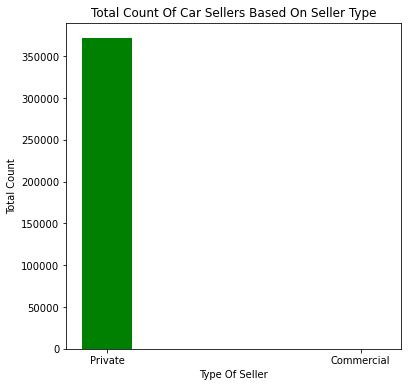

In [13]:
#Create the graph.
dataGraphSeller = {'Private':sellerPrivate,'Commercial':sellerCommercial}

sellerType = list(dataGraphSeller.keys())
sellerCount = list(dataGraphSeller.values())

fig = plt.figure(figsize = (6,6))

plt.bar(sellerType, sellerCount, color ='green', width = 0.2)


plt.xlabel("Type Of Seller")
plt.ylabel("Total Count")
plt.title("Total Count Of Car Sellers Based On Seller Type")
plt.show()

### Bar Graph For The Number Of Offers Based On Offer Type

In [14]:
#Get Unique Values of Offer Types.
df['offerType'].unique()

array(['Offer', 'Wanted'], dtype=object)

In [15]:
#Get the Value Counts of each Offer Type.
print(df['offerType'].value_counts()['Offer'])
print(df['offerType'].value_counts()['Wanted'])

371516
12


In [16]:
#Assign Values to variables.
offerOffer = df['offerType'].value_counts()['Offer']
offerWanted = df['offerType'].value_counts()['Wanted']

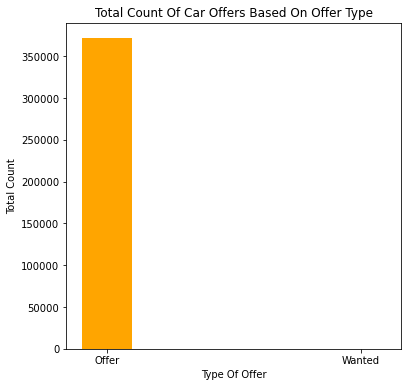

In [17]:
#Create the graph.
dataGraphOffer = {'Offer':offerOffer,'Wanted':offerWanted}

offerType = list(dataGraphOffer.keys())
offerCount = list(dataGraphOffer.values())

fig = plt.figure(figsize = (6,6))

plt.bar(offerType, offerCount, color ='orange', width = 0.2)


plt.xlabel("Type Of Offer")
plt.ylabel("Total Count")
plt.title("Total Count Of Car Offers Based On Offer Type")
plt.show()

### Bar Graph For The Number Of Tests Based On Test Type

In [18]:
#Get Unique Values of Test Types.
df['abtest'].unique()

array(['test', 'control'], dtype=object)

In [19]:
#Get the Value Counts of each Test Type.
print(df['abtest'].value_counts()['test'])
print(df['abtest'].value_counts()['control'])

192585
178943


In [20]:
#Assign Values to variables.
abtestTest = df['abtest'].value_counts()['test']
abtestControl = df['abtest'].value_counts()['control']

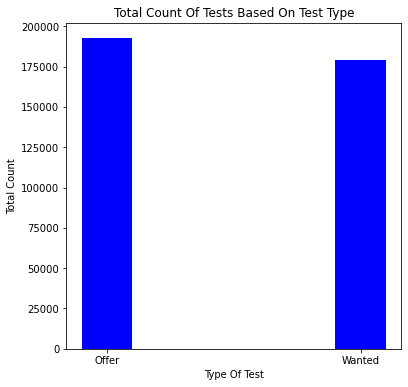

In [21]:
#Create the graph.
dataABTEST = {'Offer':abtestTest,'Wanted':abtestControl}

testType = list(dataABTEST.keys())
testCount = list(dataABTEST.values())

fig = plt.figure(figsize = (6,6))

plt.bar(testType, testCount, color ='blue', width = 0.2)


plt.xlabel("Type Of Test")
plt.ylabel("Total Count")
plt.title("Total Count Of Tests Based On Test Type")
plt.show()

### Bar Graph For The Number Of Vehicles Based On Vehicle Type

In [22]:
#Get Unique Values of Vehicle Types.
df['vehicleType'].unique()

array([nan, 'Coupe', 'SUV', 'Small', 'Limousine', 'Convertible', 'Bus',
       'Combi', 'Other'], dtype=object)

In [23]:
#Get the Value Counts of each Vehicle Type.
df['vehicleType'].value_counts()

Limousine      95894
Small          80023
Combi          67564
Bus            30201
Convertible    22898
Coupe          19015
SUV            14707
Other           3357
Name: vehicleType, dtype: int64

In [24]:
vehicleTypeLimousine = df['vehicleType'].value_counts()['Limousine']
vehicleTypeCoupe = df['vehicleType'].value_counts()['Coupe']
vehicleTypeSUV = df['vehicleType'].value_counts()['SUV']
vehicleTypeSmallCar = df['vehicleType'].value_counts()['Small']
vehicleTypeConvertible = df['vehicleType'].value_counts()['Convertible']
vehicleTypeBus = df['vehicleType'].value_counts()['Bus']
vehicleTypeCombi = df['vehicleType'].value_counts()['Combi']
vehicleTypeOther = df['vehicleType'].value_counts()['Other']

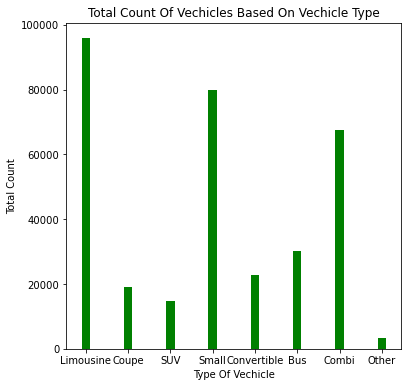

In [25]:
#Create the graph.
dataVehicle = {'Limousine':vehicleTypeLimousine,'Coupe':vehicleTypeCoupe,
               'SUV':vehicleTypeSUV,'Small':vehicleTypeSmallCar,'Convertible':vehicleTypeConvertible,
               'Bus':vehicleTypeBus,'Combi':vehicleTypeCombi,'Other':vehicleTypeOther}

vehicleType = list(dataVehicle.keys())
vehicleCount = list(dataVehicle.values())

fig = plt.figure(figsize = (6,6))

plt.bar(vehicleType, vehicleCount, color ='green', width = 0.2)


plt.xlabel("Type Of Vechicle")
plt.ylabel("Total Count")
plt.title("Total Count Of Vechicles Based On Vechicle Type")
plt.show()

### Bar Graph For The Number Of Gearboxes Based On Gearbox Type

In [26]:
#Get the Value Counts of each Vehicle Type.
df['gearbox'].value_counts()

Manual       274214
Automatic     77105
Name: gearbox, dtype: int64

In [27]:
#Assign Values to variables.
gearboxManual = df['gearbox'].value_counts()['Manual']
gearboxAuto = df['gearbox'].value_counts()['Automatic']

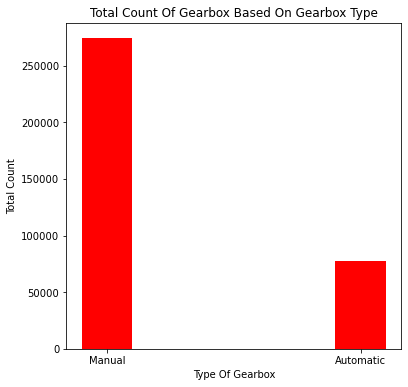

In [28]:
#Create the graph.
dataGearbox = {'Manual':gearboxManual,'Automatic':gearboxAuto}

gearboxType = list(dataGearbox.keys())
gearboxCount = list(dataGearbox.values())

fig = plt.figure(figsize = (6,6))

plt.bar(gearboxType, gearboxCount, color ='red', width = 0.2)


plt.xlabel("Type Of Gearbox")
plt.ylabel("Total Count")
plt.title("Total Count Of Gearbox Based On Gearbox Type")
plt.show()

### Bar Graph For The Number Of Fuel Machines Based On Fuel Type

In [29]:
#Get the Value Counts of each Fuel Type.
df['fuelType'].value_counts()

Petrol      223857
Diesel      107746
LPG           5378
CNG            571
Hybrid         278
Other          208
Electric       104
Name: fuelType, dtype: int64

In [30]:
#Assign Values to variables.
fuelPetrol = df['fuelType'].value_counts()['Petrol']
fuelDiesel = df['fuelType'].value_counts()['Diesel']
fuelLPG = df['fuelType'].value_counts()['LPG']
fuelCNG = df['fuelType'].value_counts()['CNG']
fuelHybrid = df['fuelType'].value_counts()['Hybrid']
fuelOther = df['fuelType'].value_counts()['Other']
fuelElectric = df['fuelType'].value_counts()['Electric']

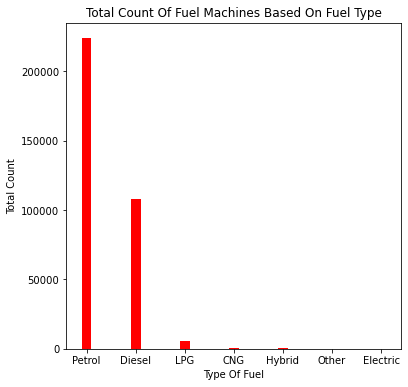

In [31]:
#Create the graph.
dataFuel = {'Petrol':fuelPetrol,'Diesel':fuelDiesel,'LPG':fuelLPG,
            'CNG':fuelCNG,'Hybrid':fuelHybrid,'Other':fuelOther,'Electric':fuelElectric}

fuelType = list(dataFuel.keys())
fuelCount = list(dataFuel.values())

fig = plt.figure(figsize = (6,6))

plt.bar(fuelType, fuelCount, color ='red', width = 0.2)


plt.xlabel("Type Of Fuel")
plt.ylabel("Total Count")
plt.title("Total Count Of Fuel Machines Based On Fuel Type")
plt.show()

### How Many Cars Have Damage That Has Not Been Repaired?

In [32]:
#Get the Value Counts of each Fuel Type.
df['notRepairedDamage'].value_counts()

No     263182
Yes     36286
Name: notRepairedDamage, dtype: int64

In [33]:
#Assign Values to variables.
noDamage = df['notRepairedDamage'].value_counts()['No']
yesDamage = df['notRepairedDamage'].value_counts()['Yes']

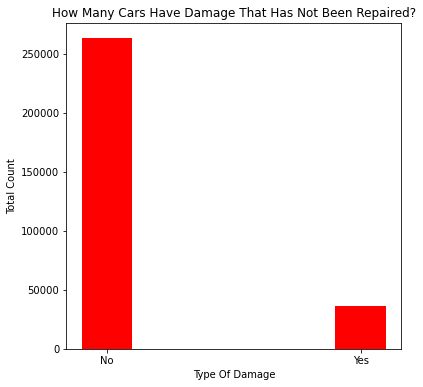

In [34]:
#Create the graph.
dataDamage = {'No':noDamage,'Yes':yesDamage}

damageType = list(dataDamage.keys())
damageCount = list(dataDamage.values())

fig = plt.figure(figsize = (6,6))

plt.bar(damageType, damageCount, color ='red', width = 0.2)


plt.xlabel("Type Of Damage")
plt.ylabel("Total Count")
plt.title("How Many Cars Have Damage That Has Not Been Repaired?")
plt.show()

### How Many Cars Have Damage That Has Not Been Repaired?

In [113]:
df.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,Private,Offer,480,test,NaN,1993,Manual,...,golf,150000,0,Petrol,VOLKSWAGEN,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Private,Offer,18300,test,Coupe,2011,Manual,...,NaN,125000,5,Diesel,AUDI,Yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Private,Offer,9800,test,SUV,2004,Automatic,...,grand,125000,8,Diesel,JEEP,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,Private,Offer,1500,test,Small,2001,Manual,...,golf,150000,6,Petrol,VOLKSWAGEN,No,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Private,Offer,3600,test,Small,2008,Manual,...,fabia,90000,7,Diesel,SKODA,No,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


## Data Cleaning Before/For Data Classification

In [35]:
df.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,Private,Offer,480,test,NaN,1993,Manual,...,golf,150000,0,Petrol,VOLKSWAGEN,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Private,Offer,18300,test,Coupe,2011,Manual,...,NaN,125000,5,Diesel,AUDI,Yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Private,Offer,9800,test,SUV,2004,Automatic,...,grand,125000,8,Diesel,JEEP,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,Private,Offer,1500,test,Small,2001,Manual,...,golf,150000,6,Petrol,VOLKSWAGEN,No,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Private,Offer,3600,test,Small,2008,Manual,...,fabia,90000,7,Diesel,SKODA,No,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [36]:
# df.corr()

In [37]:
# corr_heatmap = sb.heatmap(df.corr(), cmap="YlGnBu",annot=True)

In [38]:
df.columns

Index(['index', 'dateCrawled', 'name', 'seller', 'offerType', 'price',
       'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS',
       'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [39]:
df['postalCode'].unique()

array([70435, 66954, 90480, ..., 38528, 38325, 31096], dtype=int64)

In [40]:
dfUpdate = df.drop(['index','dateCrawled','name','powerPS','model','kilometer','dateCreated','postalCode','lastSeen','yearOfRegistration','nrOfPictures'],axis=1)

In [41]:
dfUpdate.head()

,seller,offerType,price,abtest,vehicleType,gearbox,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Private,Offer,480,test,NaN,Manual,0,Petrol,VOLKSWAGEN,NaN
1,Private,Offer,18300,test,Coupe,Manual,5,Diesel,AUDI,Yes
2,Private,Offer,9800,test,SUV,Automatic,8,Diesel,JEEP,NaN
3,Private,Offer,1500,test,Small,Manual,6,Petrol,VOLKSWAGEN,No
4,Private,Offer,3600,test,Small,Manual,7,Diesel,SKODA,No


In [42]:
dfUpdate['notRepairedDamage'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [43]:
dfUpdate['seller'].unique()

array(['Private', 'Commercial'], dtype=object)

In [44]:
dfUpdate['offerType'].unique()

array(['Offer', 'Wanted'], dtype=object)

In [45]:
dfUpdate['fuelType'].unique()

array(['Petrol', 'Diesel', nan, 'LPG', 'Other', 'Hybrid', 'CNG',
       'Electric'], dtype=object)

In [46]:
dfUpdate['brand'].unique()

array(['VOLKSWAGEN', 'AUDI', 'JEEP', 'SKODA', 'BMW', 'PEUGEOT', 'FORD',
       'MAZDA', 'NISSAN', 'RENAULT', 'MERCEDES_BENZ', 'OPEL', 'SEAT',
       'CITROEN', 'HONDA', 'FIAT', 'MINI', 'SMART', 'HYUNDAI',
       'SONSTIGE_AUTOS', 'ALFA_ROMEO', 'SUBARU', 'VOLVO', 'MITSUBISHI',
       'KIA', 'SUZUKI', 'LANCIA', 'PORSCHE', 'TOYOTA', 'CHEVROLET',
       'DACIA', 'DAIHATSU', 'TRABANT', 'SAAB', 'CHRYSLER', 'JAGUAR',
       'DAEWOO', 'ROVER', 'LAND_ROVER', 'LADA'], dtype=object)

In [47]:
dfUpdate['notRepairedDamage'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [48]:
dfUpdate["notRepairedDamageNum"] = " "

In [49]:
# dfUpdate["notRepairedDamageNum"][df['notRepairedDamage'].str.contains("nan")] = 1
# dfUpdate["notRepairedDamageNum"][df['notRepairedDamage'].str.contains("Yes")] = 2
# dfUpdate["notRepairedDamageNum"][df['notRepairedDamage'].str.contains("No")] = 3

In [50]:
dfUpdate['notRepairedDamageNum'] = 0

In [51]:
count = 0

while count < len(dfUpdate.index):
    if (dfUpdate['notRepairedDamage'][count] == "Yes"):
        dfUpdate['notRepairedDamageNum'][count] = 1
        count = count + 1
        
    if (dfUpdate['notRepairedDamage'][count] == "No"):
        dfUpdate['notRepairedDamageNum'][count] = 2
        count = count + 1
        
    else:
        count = count + 1
    

C:\Users\Nachiket\AppData\Local\Temp/ipykernel_34208/729698384.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfUpdate['notRepairedDamageNum'][count] = 1
C:\Users\Nachiket\AppData\Local\Temp/ipykernel_34208/729698384.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfUpdate['notRepairedDamageNum'][count] = 2


In [52]:
dfUpdate.head()

,seller,offerType,price,abtest,vehicleType,gearbox,monthOfRegistration,fuelType,brand,notRepairedDamage,notRepairedDamageNum
0,Private,Offer,480,test,NaN,Manual,0,Petrol,VOLKSWAGEN,NaN,0
1,Private,Offer,18300,test,Coupe,Manual,5,Diesel,AUDI,Yes,1
2,Private,Offer,9800,test,SUV,Automatic,8,Diesel,JEEP,NaN,0
3,Private,Offer,1500,test,Small,Manual,6,Petrol,VOLKSWAGEN,No,2
4,Private,Offer,3600,test,Small,Manual,7,Diesel,SKODA,No,2


In [53]:
dfUpdate['seller'].unique()

array(['Private', 'Commercial'], dtype=object)

In [54]:
dfUpdate['sellerNum'] = 0

In [55]:
count = 0

while count < len(dfUpdate.index):
    if (dfUpdate['seller'][count] == "Private"):
        dfUpdate['sellerNum'][count] = 1
        count = count + 1
        
    if (dfUpdate['seller'][count] == "Commercial"):
        dfUpdate['sellerNum'][count] = 2
        count = count + 1
        
    else:
        count = count + 1
    

C:\Users\Nachiket\AppData\Local\Temp/ipykernel_34208/2035627478.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfUpdate['sellerNum'][count] = 1
C:\Users\Nachiket\AppData\Local\Temp/ipykernel_34208/2035627478.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfUpdate['sellerNum'][count] = 2


In [56]:
dfUpdate.head()

,seller,offerType,price,abtest,vehicleType,gearbox,monthOfRegistration,fuelType,brand,notRepairedDamage,notRepairedDamageNum,sellerNum
0,Private,Offer,480,test,NaN,Manual,0,Petrol,VOLKSWAGEN,NaN,0,1
1,Private,Offer,18300,test,Coupe,Manual,5,Diesel,AUDI,Yes,1,0
2,Private,Offer,9800,test,SUV,Automatic,8,Diesel,JEEP,NaN,0,1
3,Private,Offer,1500,test,Small,Manual,6,Petrol,VOLKSWAGEN,No,2,0
4,Private,Offer,3600,test,Small,Manual,7,Diesel,SKODA,No,2,1


In [57]:
dfUpdate['offerType'].unique()

array(['Offer', 'Wanted'], dtype=object)

In [58]:
dfUpdate['offerTypeNum'] = 0

In [59]:
count = 0

while count < len(dfUpdate.index):
    if (dfUpdate['offerType'][count] == "Offer"):
        dfUpdate['offerTypeNum'][count] = 0
        count = count + 1
        
    if (dfUpdate['offerType'][count] == "Wanted"):
        dfUpdate['offerTypeNum'][count] = 1
        count = count + 1
        
    else:
        count = count + 1
    

C:\Users\Nachiket\AppData\Local\Temp/ipykernel_34208/3399907744.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfUpdate['offerTypeNum'][count] = 0
C:\Users\Nachiket\AppData\Local\Temp/ipykernel_34208/3399907744.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfUpdate['offerTypeNum'][count] = 1


In [60]:
dfUpdate.head()

,seller,offerType,price,abtest,vehicleType,gearbox,monthOfRegistration,fuelType,brand,notRepairedDamage,notRepairedDamageNum,sellerNum,offerTypeNum
0,Private,Offer,480,test,NaN,Manual,0,Petrol,VOLKSWAGEN,NaN,0,1,0
1,Private,Offer,18300,test,Coupe,Manual,5,Diesel,AUDI,Yes,1,0,0
2,Private,Offer,9800,test,SUV,Automatic,8,Diesel,JEEP,NaN,0,1,0
3,Private,Offer,1500,test,Small,Manual,6,Petrol,VOLKSWAGEN,No,2,0,0
4,Private,Offer,3600,test,Small,Manual,7,Diesel,SKODA,No,2,1,0


In [61]:
dfUpdate['fuelType'].unique()

array(['Petrol', 'Diesel', nan, 'LPG', 'Other', 'Hybrid', 'CNG',
       'Electric'], dtype=object)

In [62]:
dfUpdate['fuelTypeNum'] = 0

In [63]:
count = 0

while count < len(dfUpdate.index):
    if (dfUpdate['fuelType'][count] == "Petrol"):
        dfUpdate['fuelTypeNum'][count] = 1
        count = count + 1
        
    elif (dfUpdate['fuelType'][count] == "Diesel"):
        dfUpdate['fuelTypeNum'][count] = 2
        count = count + 1
        
    if (dfUpdate['fuelType'][count] == "LPG"):
        dfUpdate['fuelTypeNum'][count] = 3
        count = count + 1
        
    if (dfUpdate['fuelType'][count] == "Other"):
        dfUpdate['fuelTypeNum'][count] = 4
        count = count + 1
        
    if (dfUpdate['fuelType'][count] == "Hybrid"):
        dfUpdate['fuelTypeNum'][count] = 5
        count = count + 1
        
    if (dfUpdate['fuelType'][count] == "CNG"):
        dfUpdate['fuelTypeNum'][count] = 6
        count = count + 1
        
    if (dfUpdate['fuelType'][count] == "Electric"):
        dfUpdate['fuelTypeNum'][count] = 7
        count = count + 1
        
    else:
        count = count + 1
    

C:\Users\Nachiket\AppData\Local\Temp/ipykernel_34208/2583241003.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfUpdate['fuelTypeNum'][count] = 1
C:\Users\Nachiket\AppData\Local\Temp/ipykernel_34208/2583241003.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfUpdate['fuelTypeNum'][count] = 2
C:\Users\Nachiket\AppData\Local\Temp/ipykernel_34208/2583241003.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfUpdate['fuelTypeNu

In [64]:
dfUpdate.head()

,seller,offerType,price,abtest,vehicleType,gearbox,monthOfRegistration,fuelType,brand,notRepairedDamage,notRepairedDamageNum,sellerNum,offerTypeNum,fuelTypeNum
0,Private,Offer,480,test,NaN,Manual,0,Petrol,VOLKSWAGEN,NaN,0,1,0,1
1,Private,Offer,18300,test,Coupe,Manual,5,Diesel,AUDI,Yes,1,0,0,0
2,Private,Offer,9800,test,SUV,Automatic,8,Diesel,JEEP,NaN,0,1,0,2
3,Private,Offer,1500,test,Small,Manual,6,Petrol,VOLKSWAGEN,No,2,0,0,0
4,Private,Offer,3600,test,Small,Manual,7,Diesel,SKODA,No,2,1,0,2


In [65]:
dfUpdate['abtest'].unique()

array(['test', 'control'], dtype=object)

In [66]:
dfUpdate['abtestNum'] = 0

In [67]:
count = 0

while count < len(dfUpdate.index):
    if (dfUpdate['abtest'][count] == "test"):
        dfUpdate['abtestNum'][count] = 1
        count = count + 1
        
    elif (dfUpdate['abtest'][count] == "control"):
        dfUpdate['abtestNum'][count] = 2
        count = count + 1
        
        
    else:
        count = count + 1
    

C:\Users\Nachiket\AppData\Local\Temp/ipykernel_34208/1612054353.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfUpdate['abtestNum'][count] = 1
C:\Users\Nachiket\AppData\Local\Temp/ipykernel_34208/1612054353.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfUpdate['abtestNum'][count] = 2


In [68]:
dfUpdate.head()

,seller,offerType,price,abtest,vehicleType,gearbox,monthOfRegistration,fuelType,brand,notRepairedDamage,notRepairedDamageNum,sellerNum,offerTypeNum,fuelTypeNum,abtestNum
0,Private,Offer,480,test,NaN,Manual,0,Petrol,VOLKSWAGEN,NaN,0,1,0,1,1
1,Private,Offer,18300,test,Coupe,Manual,5,Diesel,AUDI,Yes,1,0,0,0,1
2,Private,Offer,9800,test,SUV,Automatic,8,Diesel,JEEP,NaN,0,1,0,2,1
3,Private,Offer,1500,test,Small,Manual,6,Petrol,VOLKSWAGEN,No,2,0,0,0,1
4,Private,Offer,3600,test,Small,Manual,7,Diesel,SKODA,No,2,1,0,2,1


In [69]:
dfUpdate['brand'].unique()

array(['VOLKSWAGEN', 'AUDI', 'JEEP', 'SKODA', 'BMW', 'PEUGEOT', 'FORD',
       'MAZDA', 'NISSAN', 'RENAULT', 'MERCEDES_BENZ', 'OPEL', 'SEAT',
       'CITROEN', 'HONDA', 'FIAT', 'MINI', 'SMART', 'HYUNDAI',
       'SONSTIGE_AUTOS', 'ALFA_ROMEO', 'SUBARU', 'VOLVO', 'MITSUBISHI',
       'KIA', 'SUZUKI', 'LANCIA', 'PORSCHE', 'TOYOTA', 'CHEVROLET',
       'DACIA', 'DAIHATSU', 'TRABANT', 'SAAB', 'CHRYSLER', 'JAGUAR',
       'DAEWOO', 'ROVER', 'LAND_ROVER', 'LADA'], dtype=object)

In [71]:
dfUpdate = dfUpdate.drop(['seller','offerType','abtest','fuelType','notRepairedDamage'],axis=1)

In [72]:
dfUpdate.head()

,price,vehicleType,gearbox,monthOfRegistration,brand,notRepairedDamageNum,sellerNum,offerTypeNum,fuelTypeNum,abtestNum
0,480,NaN,Manual,0,VOLKSWAGEN,0,1,0,1,1
1,18300,Coupe,Manual,5,AUDI,1,0,0,0,1
2,9800,SUV,Automatic,8,JEEP,0,1,0,2,1
3,1500,Small,Manual,6,VOLKSWAGEN,2,0,0,0,1
4,3600,Small,Manual,7,SKODA,2,1,0,2,1


In [73]:
dfUpdate['vehicleType'].unique()

array([nan, 'Coupe', 'SUV', 'Small', 'Limousine', 'Convertible', 'Bus',
       'Combi', 'Other'], dtype=object)

In [74]:
dfUpdate['vehicleTypeNum'] = 0

In [75]:
count = 0

while count < len(dfUpdate.index):
    if (dfUpdate['vehicleType'][count] == "Coupe"):
        dfUpdate['vehicleTypeNum'][count] = 1
        count = count + 1
        
    elif (dfUpdate['vehicleType'][count] == "SUV"):
        dfUpdate['vehicleTypeNum'][count] = 2
        count = count + 1
        
    if (dfUpdate['vehicleType'][count] == "Small"):
        dfUpdate['vehicleTypeNum'][count] = 3
        count = count + 1
        
    if (dfUpdate['vehicleType'][count] == "Limousine"):
        dfUpdate['vehicleTypeNum'][count] = 4
        count = count + 1
        
    if (dfUpdate['vehicleType'][count] == "Convertible"):
        dfUpdate['vehicleTypeNum'][count] = 5
        count = count + 1
        
    if (dfUpdate['vehicleType'][count] == "Bus"):
        dfUpdate['vehicleTypeNum'][count] = 6
        count = count + 1
        
    if (dfUpdate['vehicleType'][count] == "Combi"):
        dfUpdate['vehicleTypeNum'][count] = 7
        count = count + 1
        
    if (dfUpdate['vehicleType'][count] == "Other"):
        dfUpdate['vehicleTypeNum'][count] = 8
        count = count + 1
        
    else:
        count = count + 1
    

C:\Users\Nachiket\AppData\Local\Temp/ipykernel_34208/3042863957.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfUpdate['vehicleTypeNum'][count] = 1
C:\Users\Nachiket\AppData\Local\Temp/ipykernel_34208/3042863957.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfUpdate['vehicleTypeNum'][count] = 3
C:\Users\Nachiket\AppData\Local\Temp/ipykernel_34208/3042863957.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfUpdate['veh

In [76]:
dfUpdate.head()

,price,vehicleType,gearbox,monthOfRegistration,brand,notRepairedDamageNum,sellerNum,offerTypeNum,fuelTypeNum,abtestNum,vehicleTypeNum
0,480,NaN,Manual,0,VOLKSWAGEN,0,1,0,1,1,0
1,18300,Coupe,Manual,5,AUDI,1,0,0,0,1,1
2,9800,SUV,Automatic,8,JEEP,0,1,0,2,1,0
3,1500,Small,Manual,6,VOLKSWAGEN,2,0,0,0,1,3
4,3600,Small,Manual,7,SKODA,2,1,0,2,1,0


In [77]:
dfUpdate = dfUpdate.drop(['vehicleType','price'],axis=1)

In [78]:
dfUpdate['gearbox'].unique()

array(['Manual', 'Automatic', nan], dtype=object)

In [79]:
dfUpdate['gearboxNum'] = 0

In [81]:
count = 0

while count < len(dfUpdate.index):
    if (dfUpdate['gearbox'][count] == "Manual"):
        dfUpdate['gearboxNum'][count] = 1
        count = count + 1
        
    elif (dfUpdate['gearbox'][count] == "Automatic"):
        dfUpdate['gearboxNum'][count] = 2
        count = count + 1
        
    else:
        count = count + 1

C:\Users\Nachiket\AppData\Local\Temp/ipykernel_34208/3306797931.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfUpdate['gearboxNum'][count] = 1
C:\Users\Nachiket\AppData\Local\Temp/ipykernel_34208/3306797931.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfUpdate['gearboxNum'][count] = 2


In [82]:
dfUpdate.head()

,gearbox,monthOfRegistration,brand,notRepairedDamageNum,sellerNum,offerTypeNum,fuelTypeNum,abtestNum,vehicleTypeNum,gearboxNum
0,Manual,0,VOLKSWAGEN,0,1,0,1,1,0,1
1,Manual,5,AUDI,1,0,0,0,1,1,1
2,Automatic,8,JEEP,0,1,0,2,1,0,2
3,Manual,6,VOLKSWAGEN,2,0,0,0,1,3,1
4,Manual,7,SKODA,2,1,0,2,1,0,1


In [83]:
dfUpdateNum = dfUpdate.drop(['brand','gearbox'], axis = 1)

In [84]:
dfUpdateNum.head()

,monthOfRegistration,notRepairedDamageNum,sellerNum,offerTypeNum,fuelTypeNum,abtestNum,vehicleTypeNum,gearboxNum
0,0,0,1,0,1,1,0,1
1,5,1,0,0,0,1,1,1
2,8,0,1,0,2,1,0,2
3,6,2,0,0,0,1,3,1
4,7,2,1,0,2,1,0,1


## Random Forest Classification To Predict Gearboxes

In [107]:
#Split the dataset into training and testing datasets

X = dfUpdateNum.drop(['gearboxNum','monthOfRegistration'],axis=1)
y = dfUpdateNum['gearboxNum']

In [108]:
# Splitting arrays or matrices into random train and test subsets 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 

In [109]:
# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100) 

# Training the model on the training dataset 
# fit function is used to train the model using the training sets as parameters 
clf.fit(X_train, y_train) 

# performing predictions on the test dataset 
y_pred = clf.predict(X_test) 

# metrics are used to find accuracy or error 
from sklearn import metrics 
print() 

# using metrics module for accuracy calculation 
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred)) 
print("PRECISION OF THE MODEL: ", metrics.precision_score(y_test, y_pred,average='macro')) 
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, y_pred,average='macro')) 
print("F1 SCORE OF THE MODEL: ", metrics.f1_score(y_test, y_pred,average='macro')) 

#print("ROC_AUC OF THE MODEL: ", metrics.roc_auc_score(y_test, y_pred,multi_class='ovr')) 




ACCURACY OF THE MODEL:  0.7395297258887621
PRECISION OF THE MODEL:  0.6033131269477227
RECALL OF THE MODEL:  0.34220262964244724
F1 SCORE OF THE MODEL:  0.30463478009365813


## Gradient Boosting Classification To Predict Gearboxes

In [110]:
#Split the dataset into training and testing datasets

X = dfUpdateNum.drop(['gearboxNum','monthOfRegistration'],axis=1)
y = dfUpdateNum['gearboxNum']

In [111]:
# Splitting arrays or matrices into random train and test subsets 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 

In [112]:
# creating a RF classifier 
clf = GradientBoostingClassifier(n_estimators = 100) 

# Training the model on the training dataset 
# fit function is used to train the model using the training sets as parameters 
clf.fit(X_train, y_train) 

# performing predictions on the test dataset 
y_pred = clf.predict(X_test) 

# metrics are used to find accuracy or error 
from sklearn import metrics 
print() 

# using metrics module for accuracy calculation 
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred)) 
print("PRECISION OF THE MODEL: ", metrics.precision_score(y_test, y_pred,average='macro')) 
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, y_pred,average='macro')) 
print("F1 SCORE OF THE MODEL: ", metrics.f1_score(y_test, y_pred,average='macro')) 

#print("ROC_AUC OF THE MODEL: ", metrics.roc_auc_score(y_test, y_pred,multi_class='ovr')) 




ACCURACY OF THE MODEL:  0.7406278934562133
PRECISION OF THE MODEL:  0.5721966940918572
RECALL OF THE MODEL:  0.3410313425445714
F1 SCORE OF THE MODEL:  0.30152717654312805


In [115]:
updateHM = dfUpdateNum.corr()

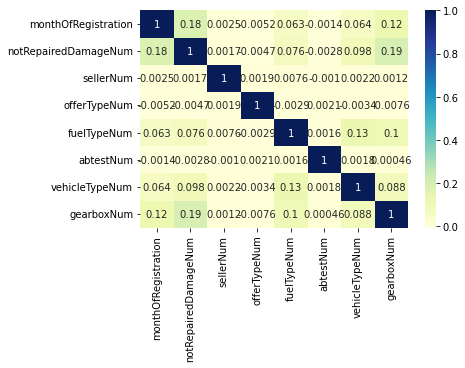

In [116]:
heatmap = sb.heatmap(updateHM, cmap="YlGnBu", annot=True)
plt.show()